

# **NLP Task 2**

## **DJS Synapse Learning Period**
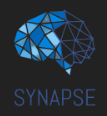

#**Word Embedding**
2 types:


1.   Count or Frequency based (BoW, TF-IDF, One Hot encoding)
2.   Deep Learning Trained models (Word2Vec, Average Word2Vec)

Word2Vec: CBOW, SkipGrams
Resources: https://youtu.be/Z1VsHYcNXDI

In [2]:
!pip install gensim==4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 54.8 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [1]:
import gensim

In [2]:
gensim.__version__

'4.2.0'

In [3]:
import pandas as pd

Dataset link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [79]:
# Load the dataset and delete the latter 2 columns while preprocessing

df = pd.read_csv('/content/drive/MyDrive/synapse_dataset/IMDB Dataset.csv', encoding = "ISO-8859-1")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [8]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Create a function to pre-process your data. Using stemming or lemmatization is upto your own choice
stemmer = PorterStemmer()

sen = df.review
token_sen_stem = []
corp_stem=[]
for i in range(len(sen)):
  rev = re.sub('[^a-zA-Z]', ' ', sen[i])
  rev = rev.lower()
  rev = nltk.word_tokenize(rev)
  rev = [stemmer.stem(word) for word in rev if word not in set(stopwords.words('english'))]
  token_sen_stem.append(rev)
  rev = ' '.join(rev)
  corp_stem.append(rev)

In [80]:
lemmatizer = WordNetLemmatizer()

def preprocessing(doc):  
  word_tokenized_doc = []
  corp_doc = []
  
  for i in range(len(doc)):
    rev = re.sub('[^a-zA-Z]', ' ', doc[i])
    rev = rev.lower()
    rev = nltk.word_tokenize(rev)
    rev = [lemmatizer.lemmatize(word) for word in rev if word not in set(stopwords.words('english'))]
    word_tokenized_doc.append(rev)
    rev = ' '.join(rev)
    corp_doc.append(rev)
  
  return word_tokenized_doc, corp_doc

In [ ]:
# Preprocessing
sen = df.review
token_sen, corp = preprocessing(sen)

In [133]:
print(corp[:5])

['one reviewer mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away br br would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison exper

In [132]:
print(token_sen[:5])

[['one', 'reviewer', 'mentioned', 'watching', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened', 'br', 'br', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'br', 'br', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'many', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'never', 'far', 'away', 'br', 'br', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'go', 'show', 'dare', 'forget', 'pretty', 'picture', 'painted', 'mainstream', 'audience', 'forget', 'c

In [ ]:
# index = 0
# empty_corp = []

# for i in token_sen:
#   if (len(i) == 0):
#     print(index, i, df.iloc[index, 1])
#     empty_corp.append(index)
#   index += 1

# empty_corp

[]

##Word2Vec


###CBOW or SkipGram (sg = 0/1) default is CBOW

Word2Vec resources: https://builtin.com/machine-learning/nlp-word2vec-python

In [84]:
model = gensim.models.Word2Vec(token_sen,window=5,min_count=2) #window, min_count, max_count, size are important hyperparameters

In [85]:
model.wv.most_similar('man')

[('lady', 0.6263245344161987),
 ('men', 0.5851364135742188),
 ('woman', 0.5541417598724365),
 ('person', 0.4670017659664154),
 ('paydirt', 0.4265691339969635),
 ('guy', 0.40125417709350586),
 ('retriever', 0.4000828266143799),
 ('loretta', 0.38606128096580505),
 ('husband', 0.3856807351112366),
 ('boy', 0.38421666622161865)]

##Average Word2Vec
In average Word2Vec, the model is fed with an average of all the vectors obtained from the vectorization techniques. For eg. in this task, our model will be fed a single array of size Nx1 which is an average vector of all the vectors in the sentence.

In [17]:
import numpy as np

In [86]:
def avg_word2vec(doc):
  return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

In [87]:
model.wv['man']

array([ 1.9628359 ,  1.1327534 ,  1.7140853 , -0.48785305,  1.1795197 ,
       -1.4893537 , -1.1937377 , -0.12767726, -2.069702  , -1.3169858 ,
        0.63926744,  0.26450175,  0.579584  , -2.621257  , -0.01621821,
       -0.5872785 ,  0.5076361 ,  0.7090408 , -2.2013505 , -1.4850848 ,
        1.6274558 , -0.8357592 ,  0.8793548 ,  1.6522888 , -2.0623684 ,
        3.534709  , -1.4418297 ,  0.06627538,  0.5190997 ,  0.19820164,
       -0.7819557 ,  0.60507333,  1.917105  ,  0.47744477,  0.85117143,
       -0.95159096,  0.9784454 ,  0.6675738 ,  0.79377675, -4.791917  ,
        1.3645927 ,  0.6606882 , -0.16055204,  0.9111909 , -0.59541565,
        1.1300812 ,  3.1180527 , -1.4948388 , -1.4739906 ,  1.9030483 ,
        2.3438761 ,  1.5039645 , -2.7681472 , -2.279242  , -0.51310956,
        0.3678654 , -0.84011936,  0.70606977,  0.44398066, -0.66823786,
       -0.34491473, -0.14436282,  1.4620961 ,  1.5792116 ,  1.8169017 ,
       -1.7656028 , -1.0236249 ,  1.2332354 , -0.5993716 ,  2.31

In [33]:
# Train a suitable model using Word2Vec and avg_word2vec and find out it's classification report and accuracy on the given dataset
# Add your code in the following cells

In [ ]:
# Add your code for the Word2Vec model in the following cells

In [ ]:
# Add your code for the Average Word2Vec model in the following cells

In [88]:
len(corp)

50000

In [ ]:
corp_ = corp[:1000]

In [137]:
x = []

for sent in corp_:
  x.append(avg_word2vec(sent))
print("Shape: ", np.shape(x))

Shape:  (1000, 100)


In [140]:
print(x[:2])

[array([-0.48248538, -0.14515088,  0.62840134, -0.36693108, -0.794281  ,
       -0.9456093 , -0.58319837,  0.33492714, -0.29716045,  0.64987075,
       -1.8278444 , -0.24358477, -0.42025974,  0.41483983,  0.70374525,
        0.03158717,  0.46774703, -0.7379318 ,  1.5283427 ,  0.72870195,
        0.26762128, -0.14533556,  0.4743063 , -0.65675026, -0.24001491,
        0.16235435, -0.6052191 , -0.09518266, -0.46308988,  0.18148185,
        0.4395023 ,  0.28767392, -0.3620082 , -0.17457204, -0.2121067 ,
       -0.16460559,  0.01531517,  0.10210807, -0.58417904, -0.9110592 ,
       -1.0279164 , -0.49967244, -1.0879296 ,  0.8241603 ,  0.85285145,
        0.57994723, -0.78201246, -0.42148903,  0.02355323,  0.05857912,
        0.46110696,  0.62232864, -0.70307386, -0.2841952 ,  0.6532551 ,
        0.11485007, -1.4900162 , -0.4283258 , -0.8113436 ,  0.6379198 ,
        0.26013488,  0.77999824, -1.0002809 , -0.779709  ,  0.3747914 ,
        0.99125844,  1.6145536 ,  0.36270374,  0.05947043, -0.0

In [105]:
y=pd.get_dummies(df['sentiment'])
y=y.iloc[:1000,1].values

In [106]:
print(np.shape(x))

(1000, 100)


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
svc = SVC(kernel='linear', C = 1.0)
detection_model = svc.fit(X_train, y_train)

y_pred= detection_model.predict(X_test)

In [108]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1], dtype=uint8)

In [109]:
score=accuracy_score(y_test,y_pred)
print(score)

print(classification_report(y_pred,y_test))

# More training data gets more accuracy, but it costs more

0.58
              precision    recall  f1-score   support

           0       0.45      0.71      0.55        73
           1       0.75      0.50      0.60       127

    accuracy                           0.58       200
   macro avg       0.60      0.61      0.58       200
weighted avg       0.64      0.58      0.59       200



#Create your own embedding layer using Keras

Advised to use colab for GPU purposes.

You can use jupyter nb if your PC has a dedicated graphics card.

If using colab, got to the "Runtime" tab and change "Runtime type" to GPU

In [110]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import numpy as np

##One-Hot representation

The one-hot library on the input vocabulary size returns an array of integers ranging from 1 to vocabulary size. It indicates the index of the '1' in the one hot representation for the word.

Build sequential models using keras: https://www.youtube.com/watch?v=8uC-WT1LYnU, https://www.youtube.com/watch?v=VGCHcgmZu24

In [112]:
vocab = len(model.wv.index_to_key) + 1000
vocab

56116

In [ ]:
# sentences = []
# for i in df.review:
#   # print(df.review[i])
#   # pass
#   sentences.append(i)
# sentences

# texts = [[word.lower() for word in line.split()] for line in df.review[:100]]
# texts

In [115]:
# OH_rep = [one_hot('''sentences''', '''vocabulary size''')] choose a good vocabulary size to avoid out of vocabulary error
# Add your code here
OH_rep = []
for sentence in corp_:
  temp = []
  for words in sentence:
    for num in one_hot(words, vocab):
      temp.append(num)
  OH_rep.append(temp)
print(len(OH_rep))

1000


In [117]:
print(OH_rep[:10])

[[40371, 10998, 52085, 16763, 52085, 696, 3541, 52085, 40207, 52085, 16763, 17922, 52085, 10998, 17618, 3541, 40371, 10998, 52085, 5657, 40207, 13154, 17618, 50642, 53435, 3541, 10998, 188, 40371, 12166, 52085, 28283, 3541, 4893, 40371, 5657, 52085, 53435, 40371, 40371, 53540, 52085, 5657, 16763, 3541, 188, 53435, 17618, 52085, 21052, 13154, 50642, 17618, 9463, 18297, 53435, 13154, 28283, 28283, 52085, 10998, 52085, 5657, 44303, 16763, 44303, 16763, 128, 3541, 16763, 4893, 17618, 17618, 53435, 3541, 10998, 188, 4893, 17618, 16763, 8412, 50642, 53540, 40371, 12166, 44303, 16763, 8412, 17618, 13154, 9463, 3541, 17618, 18297, 8412, 10998, 128, 9463, 3541, 10998, 50642, 53435, 3541, 10998, 188, 4893, 50642, 52085, 10998, 52085, 696, 3541, 40371, 9463, 52085, 10998, 50642, 52085, 4893, 52085, 17618, 16763, 3541, 188, 53435, 17618, 40207, 40371, 16763, 5657, 188, 40371, 17618, 16763, 8412, 4893, 17618, 4893, 53435, 40371, 40207, 128, 13154, 3541, 10998, 17618, 53435, 52085, 13154, 16763, 176

In [118]:
# Padding: 2 types: pre padding, post padding try both
# Wisely select the sentence length to accomodate all sentences with a couple of extra bits to avoid errors.
# Add your code here

pre_padded = pad_sequences(OH_rep, padding='pre')
print(pre_padded)
len(pre_padded)

[[    0     0     0 ...  3541  5657 52085]
 [    0     0     0 ... 40371 10998 52085]
 [    0     0     0 ... 52085 10998  5657]
 ...
 [    0     0     0 ...  5657 52085   128]
 [    0     0     0 ...  3541  9463 17922]
 [    0     0     0 ... 13154 16763 18297]]


1000

In [119]:
post_padded = pad_sequences(OH_rep, padding='post')
print(post_padded)
len(post_padded)

[[40371 10998 52085 ...     0     0     0]
 [40207 40371 10998 ...     0     0     0]
 [17618 53435 40371 ...     0     0     0]
 ...
 [ 8412  4893  8412 ...     0     0     0]
 [ 9463  3541 53540 ...     0     0     0]
 [ 9463  3541 53540 ...     0     0     0]]


1000

In [120]:
# select your feature dimensions: 5 for very small datasets, 10 is generally a good choice
dim = 10

In [121]:
from tensorflow.keras.layers import Flatten, Dense

In [123]:
# Create a sequential model with an embedding layer with the appropriate vocabulary size and the decided sentence length
# Use an appropriate optimizer 'adam' and loss function 'mse' to compile your model
# Add your code here

model = Sequential()
model.add(Embedding(vocab, dim))
model.add(Dense(1, activation='relu'))
model.add(Flatten())

model.compile(optimizer='adam', loss='mse')

In [124]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 10)          561160    
                                                                 
 dense_5 (Dense)             (None, None, 1)           11        
                                                                 
 flatten_5 (Flatten)         (None, None)              0         
                                                                 
Total params: 561,171
Trainable params: 561,171
Non-trainable params: 0
_________________________________________________________________


# **Plotting Embeddings**
T-distributed Stochastic Neighbor Embedding



Let's now visualize some of our embeddings. To plot embeddings with a dimensionality of 100 or more, we first need to map them to a dimensionality of 2. We do this with the popular [t-SNE](https://lvdmaaten.github.io/tsne/) method. T-SNE, short for t-distributed Stochastic Neighbor Embedding, helps us visualize high-dimensional data by mapping similar data to nearby points and dissimilar data to distance points in the low-dimensional space.

T-SNE is present in [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). To run it, we just have to specify the number of dimensions we'd like to map the data to ('n_components'), and the similarity metric that t-SNE should use to compute the similarity between two data points ('metric'). We're going to map to 2 dimensions and use the cosine as our similarity metric. Additionally, we use PCA as an initialization method to remove some noise and speed up computation. The [Scikit-learn user guide](https://scikit-learn.org/stable/modules/manifold.html#t-sne) contains some additional tips for optimizing performance. 

Plotting all the embeddings in our vector space would result in a very crowded figure where the labels are hardly legible. Therefore we'll focus on a subset of embeddings by selecting the 200 most similar words to a target word.

Intuition to how TSNE works: https://youtu.be/NEaUSP4YerM

In [125]:
# will take some time to run
model = gensim.models.Word2Vec(token_sen, min_count=100, window=5, vector_size=100)

In [ ]:
token_sen

In [127]:
print(model.wv.index_to_key)

['br', 'movie', 'film', 'one', 'like', 'time', 'good', 'character', 'story', 'even', 'get', 'would', 'make', 'see', 'really', 'scene', 'well', 'much', 'bad', 'people', 'great', 'also', 'first', 'show', 'way', 'thing', 'made', 'life', 'could', 'think', 'go', 'know', 'watch', 'love', 'plot', 'actor', 'two', 'many', 'seen', 'year', 'say', 'end', 'never', 'acting', 'look', 'best', 'little', 'ever', 'man', 'better', 'take', 'come', 'work', 'still', 'part', 'something', 'director', 'find', 'want', 'back', 'give', 'lot', 'real', 'guy', 'watching', 'performance', 'woman', 'play', 'old', 'funny', 'though', 'another', 'actually', 'u', 'nothing', 'role', 'going', 'new', 'every', 'girl', 'day', 'world', 'point', 'cast', 'horror', 'minute', 'comedy', 'thought', 'fact', 'feel', 'quite', 'pretty', 'got', 'star', 'action', 'around', 'seems', 'young', 'big', 'however', 'enough', 'right', 'long', 'line', 'fan', 'may', 'friend', 'bit', 'series', 'must', 'music', 'set', 'without', 'original', 'family', 's

In [128]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
target_word= 'man'
# Selecting the top 200 similar words for plotting
selected_words = [w[0] for w in model.wv.most_similar(positive=[target_word], topn=200)] + [target_word]
embeddings = [model.wv[w] for w in selected_words] + model.wv["man"]

mapped_embeddings = TSNE(n_components=2, metric='cosine', init='pca').fit_transform(embeddings)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


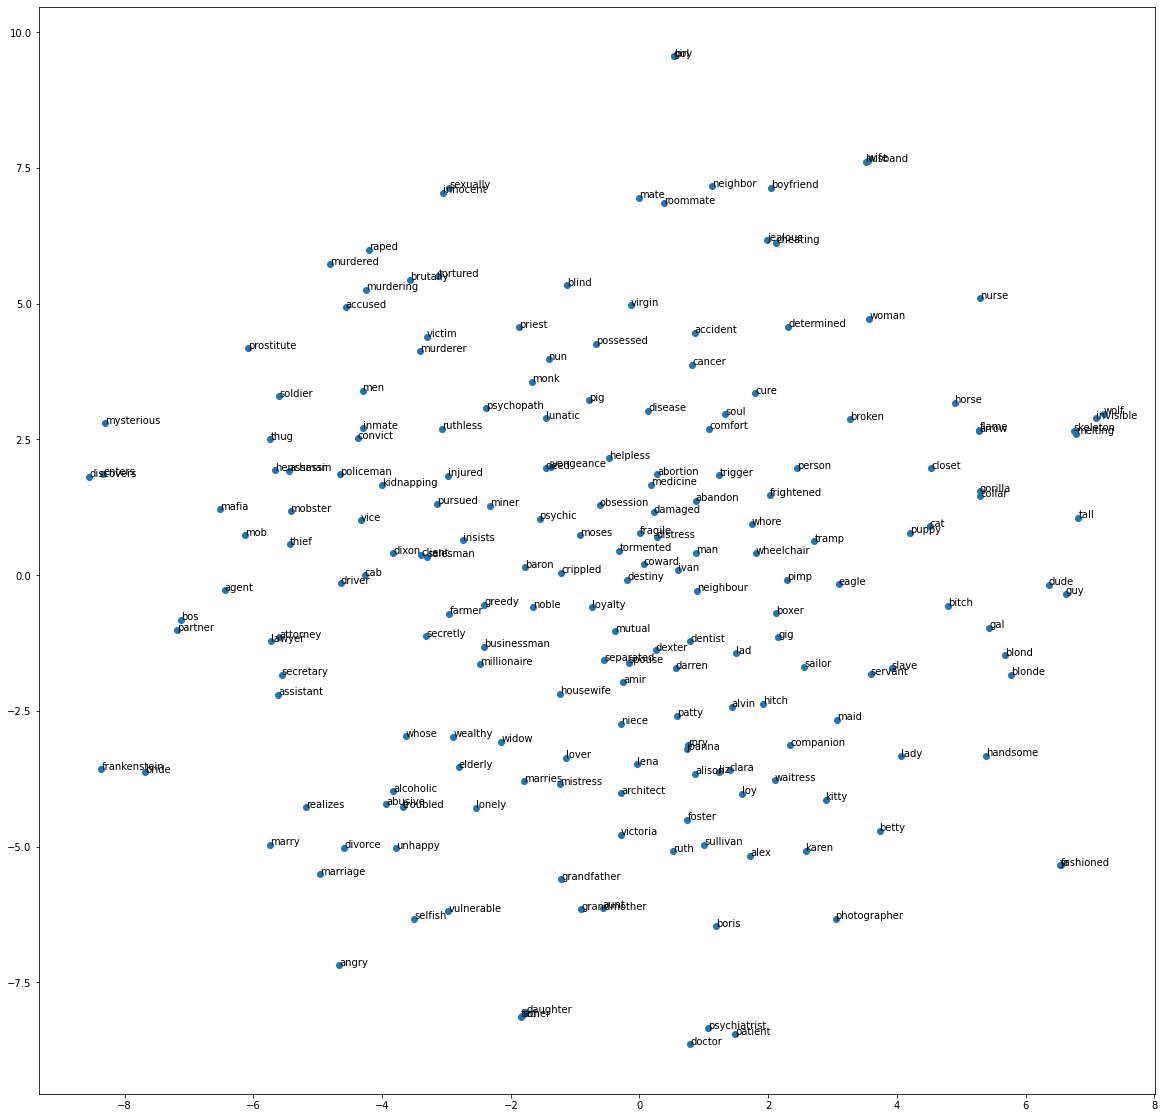

In [129]:
plt.figure(figsize=(20,20))
x = mapped_embeddings[:,0]
y = mapped_embeddings[:,1]
plt.scatter(x, y)

for i, txt in enumerate(selected_words):
    plt.annotate(txt, (x[i], y[i]))